In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date
import numpy as np

In [2]:
path = '/Users/gwynethvolkmann/Downloads/Healthcare Data Challenge Data'
os.chdir(path)

In [3]:
bill_amount = pd.read_csv("bill_amount.csv")
bill_amount.head()

,bill_id,amount
0,40315104,1552.634830
1,2660045161,1032.011951
2,1148334643,6469.605351
3,3818426276,755.965425
4,9833541918,897.347816


In [4]:
bill_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bill_id  13600 non-null  int64  
 1   amount   13600 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 212.6 KB


In [5]:
bill_amount.describe()

,bill_id,amount
count,1.360000e+04,13600.000000
mean,5.007147e+09,5464.767783
std,2.885919e+09,7717.479509
min,5.584120e+05,79.496707
25%,2.485853e+09,950.689008
50%,4.992958e+09,1516.951136
75%,7.524563e+09,7307.056573
max,9.999633e+09,81849.751340


In [6]:
bill_id = pd.read_csv("bill_id.csv")
bill_id.head()

,bill_id,patient_id,date_of_admission
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01


In [7]:
bill_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bill_id            13600 non-null  int64 
 1   patient_id         13600 non-null  object
 2   date_of_admission  13600 non-null  object
dtypes: int64(1), object(2)
memory usage: 318.9+ KB


In [8]:
bill_info = pd.merge(bill_amount, bill_id, on='bill_id')

In [9]:
bill_info.head()

,bill_id,amount,patient_id,date_of_admission
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22
1,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28
2,1148334643,6469.605351,1ce104904e9160cf3cfdb3c45b9ce4ff,2014-01-16
3,3818426276,755.965425,afdfe7216d84e13708a19cbca288379a,2013-01-22
4,9833541918,897.347816,b9a0c119dc07e07f88281964f3a4869f,2011-04-22


In [10]:
bill_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13600 entries, 0 to 13599
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_id            13600 non-null  int64  
 1   amount             13600 non-null  float64
 2   patient_id         13600 non-null  object 
 3   date_of_admission  13600 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 531.2+ KB


In [11]:
len(bill_info['patient_id'].unique())

3000

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Bill Amount')

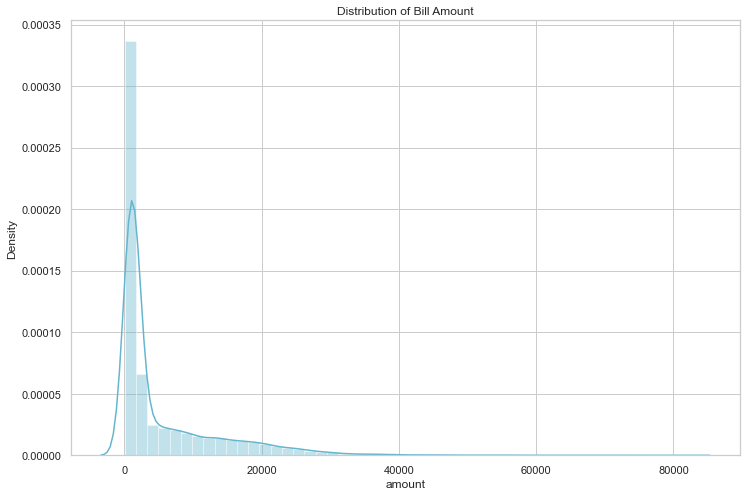

In [12]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(bill_info['amount'], kde = True, color = 'c')
plt.title('Distribution of Bill Amount')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


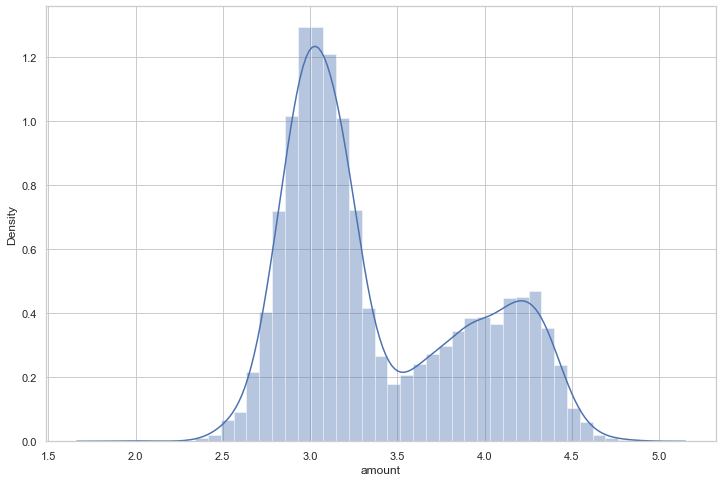

In [13]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(bill_info['amount']), kde = True )

The vast majority of the bills fall under 10k. Min=$79     Max=$81k

<AxesSubplot:xlabel='amount'>

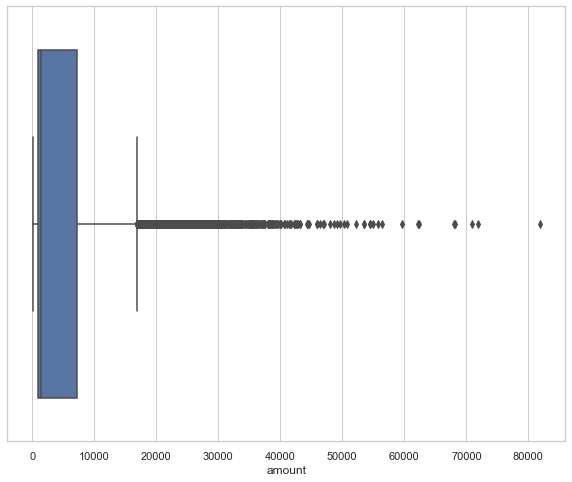

In [14]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=bill_info["amount"])

This would be a huge loss of data if constrained to data that falls within the typical parameters for eliminating outliers based on quantile. Instead I am going to trim the data to remove any amounts that are more than $50,000, based on the boxplot of the data. The fact that so many of the amounts are falling outside the standard range means that it is worth examining further. 

In [15]:
#fig_dims = (10, 4)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.lineplot(x="date_of_admission",  y="amount", ax=ax, data=bill_info)

Not a ton of readily seen seasonality = break into months during visualization. 

In [16]:
clinical_data = pd.read_csv("clinical_data.csv")
clinical_data.head()

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,...,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,...,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0


In [17]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3400 non-null   object 
 1   date_of_admission   3400 non-null   object 
 2   date_of_discharge   3400 non-null   object 
 3   medical_history_1   3400 non-null   int64  
 4   medical_history_2   3167 non-null   float64
 5   medical_history_3   3400 non-null   object 
 6   medical_history_4   3400 non-null   int64  
 7   medical_history_5   3096 non-null   float64
 8   medical_history_6   3400 non-null   int64  
 9   medical_history_7   3400 non-null   int64  
 10  preop_medication_1  3400 non-null   int64  
 11  preop_medication_2  3400 non-null   int64  
 12  preop_medication_3  3400 non-null   int64  
 13  preop_medication_4  3400 non-null   int64  
 14  preop_medication_5  3400 non-null   int64  
 15  preop_medication_6  3400 non-null   int64  
 16  sympto

In [18]:
len(clinical_data['id'].unique())

3000

In [19]:
clinical_data.medical_history_1.unique()

array([0, 1])

In [20]:
clinical_data.medical_history_2.unique()

array([ 1.,  0., nan])

In [21]:
clinical_data.medical_history_3.unique()

array(['0', 'No', '1', 'Yes'], dtype=object)

In [22]:
clinical_data["medical_history_3"].replace({"No": "0", "Yes": "1"}, inplace=True)

In [23]:
clinical_data.medical_history_3.unique()

array(['0', '1'], dtype=object)

In [24]:
clinical_data.medical_history_4.unique()

array([0, 1])

In [25]:
clinical_data.medical_history_5.unique()

array([ 0., nan,  1.])

In [26]:
clinical_data.medical_history_6.unique()

array([0, 1])

In [27]:
clinical_data.medical_history_7.unique()

array([0, 1])

In [28]:
clinical_data.symptom_1.unique()

array([0, 1])

In [29]:
clinical_data.symptom_2.unique()

array([0, 1])

In [30]:
clinical_data.symptom_3.unique()

array([0, 1])

In [31]:
clinical_data.symptom_4.unique()

array([1, 0])

In [32]:
clinical_data.symptom_5.unique()

array([1, 0])

In [33]:
clinical_data.rename(columns={"id": "patient_id"}, inplace = True)

In [34]:
clinical_data.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,0,0,0.0,1,1,...,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,0,0,0.0,1,1,...,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0


In [35]:
demographics = pd.read_csv("demographics.csv")
demographics.head()

,patient_id,gender,race,resident_status,date_of_birth
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14
1,5b6477c5de78d0b138e3b0c18e21d0ae,f,Chinese,Singapore citizen,1976-02-18
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15
4,541ad077cb4a0e64cc422673afe28aef,m,Chinese,Singaporean,1970-12-12


In [36]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_id       3000 non-null   object
 1   gender           3000 non-null   object
 2   race             3000 non-null   object
 3   resident_status  3000 non-null   object
 4   date_of_birth    3000 non-null   object
dtypes: object(5)
memory usage: 117.3+ KB


In [37]:
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

In [38]:
demographics['Age'] = demographics['date_of_birth'].apply(age)

In [39]:
demographics.head()

,patient_id,gender,race,resident_status,date_of_birth,Age
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14,50
1,5b6477c5de78d0b138e3b0c18e21d0ae,f,Chinese,Singapore citizen,1976-02-18,45
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03,39
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15,74
4,541ad077cb4a0e64cc422673afe28aef,m,Chinese,Singaporean,1970-12-12,50


In [40]:
demographics.gender.unique()

array(['Female', 'f', 'Male', 'm'], dtype=object)

In [41]:
demographics.race.unique()

array(['Indian', 'Chinese', 'Malay', 'chinese', 'India', 'Others'],
      dtype=object)

In [42]:
demographics.resident_status.unique()

array(['Singaporean', 'Singapore citizen', 'PR', 'Foreigner'],
      dtype=object)

In [43]:
demographics["gender"].replace({"f": "Female", "m": "Male"}, inplace=True)

In [44]:
demographics.head()

,patient_id,gender,race,resident_status,date_of_birth,Age
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14,50
1,5b6477c5de78d0b138e3b0c18e21d0ae,Female,Chinese,Singapore citizen,1976-02-18,45
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03,39
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15,74
4,541ad077cb4a0e64cc422673afe28aef,Male,Chinese,Singaporean,1970-12-12,50


In [45]:
demographics.gender.unique()

array(['Female', 'Male'], dtype=object)

In [46]:
demographics["race"].replace({"chinese": "Chinese"}, inplace=True)

In [47]:
df1 = pd.merge(clinical_data, demographics, on = ['patient_id'], how = 'outer')

In [48]:
df1.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,Age
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,13.2,30.9,123.0,71.3,161.0,Male,Indian,Singaporean,1976-12-19,44
1,1d21f2be18683991eb93d182d6b2d220,2015-09-17,2015-09-30,0,0.0,0,0,0.0,0,1,...,16.4,23.7,108.0,72.3,161.0,Male,Indian,Singaporean,1976-12-19,44
2,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,13.8,22.6,89.0,78.4,160.0,Female,Malay,Singaporean,1978-07-20,43
3,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,11.2,26.2,100.0,72.0,151.0,Female,Indian,Singaporean,1967-08-14,54
4,c85cf97bc6307ded0dd4fef8bad2fa09,2014-03-20,2014-03-26,1,0.0,1,0,0.0,1,0,...,18.6,28.4,88.0,72.0,151.0,Female,Indian,Singaporean,1967-08-14,54


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 0 to 3399
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3400 non-null   object 
 1   date_of_admission   3400 non-null   object 
 2   date_of_discharge   3400 non-null   object 
 3   medical_history_1   3400 non-null   int64  
 4   medical_history_2   3167 non-null   float64
 5   medical_history_3   3400 non-null   object 
 6   medical_history_4   3400 non-null   int64  
 7   medical_history_5   3096 non-null   float64
 8   medical_history_6   3400 non-null   int64  
 9   medical_history_7   3400 non-null   int64  
 10  preop_medication_1  3400 non-null   int64  
 11  preop_medication_2  3400 non-null   int64  
 12  preop_medication_3  3400 non-null   int64  
 13  preop_medication_4  3400 non-null   int64  
 14  preop_medication_5  3400 non-null   int64  
 15  preop_medication_6  3400 non-null   int64  
 16  sympto

Assumption: looking at drivers of cost based on each admission. The same patient may be admitted with different symptoms thus resulting in a different cost for the visit. 

In [50]:
df1["resident_status"].replace({"Singaporean": "Singapore citizen"}, inplace=True)

In [51]:
df1["resident_status"].unique()

array(['Singapore citizen', 'PR', 'Foreigner'], dtype=object)

In [52]:
df2 = pd.merge(df1, bill_info, on = ['patient_id', 'date_of_admission'], how = 'outer')

In [53]:
df2.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,Age,bill_id,amount
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,7654730355,1133.601902
1,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,7512568183,12338.269972
2,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,1692196063,982.332324
3,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,7968360812,951.214467
4,1d21f2be18683991eb93d182d6b2d220,2015-09-17,2015-09-30,0,0.0,0,0,0.0,0,1,...,108.0,72.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,6466235037,1498.125668


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13600 entries, 0 to 13599
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          13600 non-null  object 
 1   date_of_admission   13600 non-null  object 
 2   date_of_discharge   13600 non-null  object 
 3   medical_history_1   13600 non-null  int64  
 4   medical_history_2   12668 non-null  float64
 5   medical_history_3   13600 non-null  object 
 6   medical_history_4   13600 non-null  int64  
 7   medical_history_5   12384 non-null  float64
 8   medical_history_6   13600 non-null  int64  
 9   medical_history_7   13600 non-null  int64  
 10  preop_medication_1  13600 non-null  int64  
 11  preop_medication_2  13600 non-null  int64  
 12  preop_medication_3  13600 non-null  int64  
 13  preop_medication_4  13600 non-null  int64  
 14  preop_medication_5  13600 non-null  int64  
 15  preop_medication_6  13600 non-null  int64  
 16  symp

In [55]:
df2[3000:3001]

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,Age,bill_id,amount
3000,0d885cd18bf8e3ad5f3253bdcc44729a,2011-11-25,2011-12-01,0,0.0,1,0,0.0,0,0,...,118.0,87.6,162.0,Male,Chinese,Singapore citizen,1981-11-14,39,5861876913,947.265567


In [56]:
df2['medical_history_2'].unique()

array([ 1.,  0., nan])

In [57]:
null_columns=df2.columns[df2.isnull().any()]
df2[null_columns].isnull().sum()

medical_history_2     932
medical_history_5    1216
dtype: int64

In [58]:
df2.drop(columns=['bill_id'], inplace=True)

In [59]:
df2.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,Age,amount
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,1133.601902
1,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,12338.269972
2,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,982.332324
3,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,951.214467
4,1d21f2be18683991eb93d182d6b2d220,2015-09-17,2015-09-30,0,0.0,0,0,0.0,0,1,...,23.7,108.0,72.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,1498.125668


In [60]:
df2['length_of_stay'] = ((pd.to_datetime(df2['date_of_discharge']) - 
                            pd.to_datetime(df2['date_of_admission'])))

In [61]:
df2.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,Age,amount,length_of_stay
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,1133.601902,10 days
1,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,12338.269972,10 days
2,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,982.332324,10 days
3,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,951.214467,10 days
4,1d21f2be18683991eb93d182d6b2d220,2015-09-17,2015-09-30,0,0.0,0,0,0.0,0,1,...,108.0,72.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,1498.125668,13 days


In [62]:
df2["medical_history_2"].fillna(0.0, inplace = True)

In [63]:
df2['medical_history_2'].unique()

array([1., 0.])

In [64]:
df2["medical_history_5"].fillna(0.0, inplace = True)

In [65]:
df2['medical_history_5'].unique()

array([0., 1.])

In [69]:
df2.columns

Index(['patient_id', 'date_of_admission', 'date_of_discharge',
       'medical_history_1', 'medical_history_2', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'gender', 'race', 'resident_status',
       'date_of_birth', 'Age', 'amount', 'length_of_stay'],
      dtype='object')

In [70]:
#fig, ax = plt.subplots(figsize=(15,15))
#sns.heatmap(df2.corr(), annot=True)

In [71]:
df2.dtypes

patient_id                     object
date_of_admission              object
date_of_discharge              object
medical_history_1               int64
medical_history_2             float64
medical_history_3              object
medical_history_4               int64
medical_history_5             float64
medical_history_6               int64
medical_history_7               int64
preop_medication_1              int64
preop_medication_2              int64
preop_medication_3              int64
preop_medication_4              int64
preop_medication_5              int64
preop_medication_6              int64
symptom_1                       int64
symptom_2                       int64
symptom_3                       int64
symptom_4                       int64
symptom_5                       int64
lab_result_1                  float64
lab_result_2                  float64
lab_result_3                  float64
weight                        float64
height                        float64
gender      

In [72]:
df2['stay_length'] = df2['length_of_stay'].dt.days.astype('int16')

In [73]:
df2.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,weight,height,gender,race,resident_status,date_of_birth,Age,amount,length_of_stay,stay_length
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,1133.601902,10 days,10
1,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,12338.269972,10 days,10
2,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,982.332324,10 days,10
3,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,951.214467,10 days,10
4,1d21f2be18683991eb93d182d6b2d220,2015-09-17,2015-09-30,0,0.0,0,0,0.0,0,1,...,72.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,1498.125668,13 days,13


In [74]:
df2.drop(columns='length_of_stay', inplace=True)

In [75]:
df2.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,Age,amount,stay_length
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,1133.601902,10
1,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,12338.269972,10
2,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,982.332324,10
3,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,951.214467,10
4,1d21f2be18683991eb93d182d6b2d220,2015-09-17,2015-09-30,0,0.0,0,0,0.0,0,1,...,108.0,72.3,161.0,Male,Indian,Singapore citizen,1976-12-19,44,1498.125668,13


In [76]:
df2.drop(columns=['date_of_discharge','date_of_birth'], inplace=True)

In [77]:
df2.head()

,patient_id,date_of_admission,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,...,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,Age,amount,stay_length
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,1133.601902,10
1,1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,12338.269972,10
2,1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,982.332324,10
3,1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,951.214467,10
4,1d21f2be18683991eb93d182d6b2d220,2015-09-17,0,0.0,0,0,0.0,0,1,1,...,23.7,108.0,72.3,161.0,Male,Indian,Singapore citizen,44,1498.125668,13


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


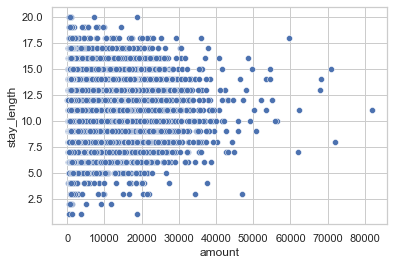

In [78]:
sns.scatterplot(df2['amount'],df2['stay_length'])
plt.show()

Medium length stays seem to be associated with a higher cost, it doesn't appear that a longer stay is one of the main drivers of cost for the stay. 

In [79]:
df2.head()

,patient_id,date_of_admission,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,...,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,Age,amount,stay_length
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,1133.601902,10
1,1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,12338.269972,10
2,1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,982.332324,10
3,1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,951.214467,10
4,1d21f2be18683991eb93d182d6b2d220,2015-09-17,0,0.0,0,0,0.0,0,1,1,...,23.7,108.0,72.3,161.0,Male,Indian,Singapore citizen,44,1498.125668,13


In [80]:
df2.set_index("patient_id", inplace = True)
df2.head()

,date_of_admission,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,Age,amount,stay_length
patient_id,,,,,,,,,,,,,,,,,,,,,
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,1133.601902,10
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,12338.269972,10
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,982.332324,10
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,951.214467,10
1d21f2be18683991eb93d182d6b2d220,2015-09-17,0,0.0,0,0,0.0,0,1,1,1,...,23.7,108.0,72.3,161.0,Male,Indian,Singapore citizen,44,1498.125668,13


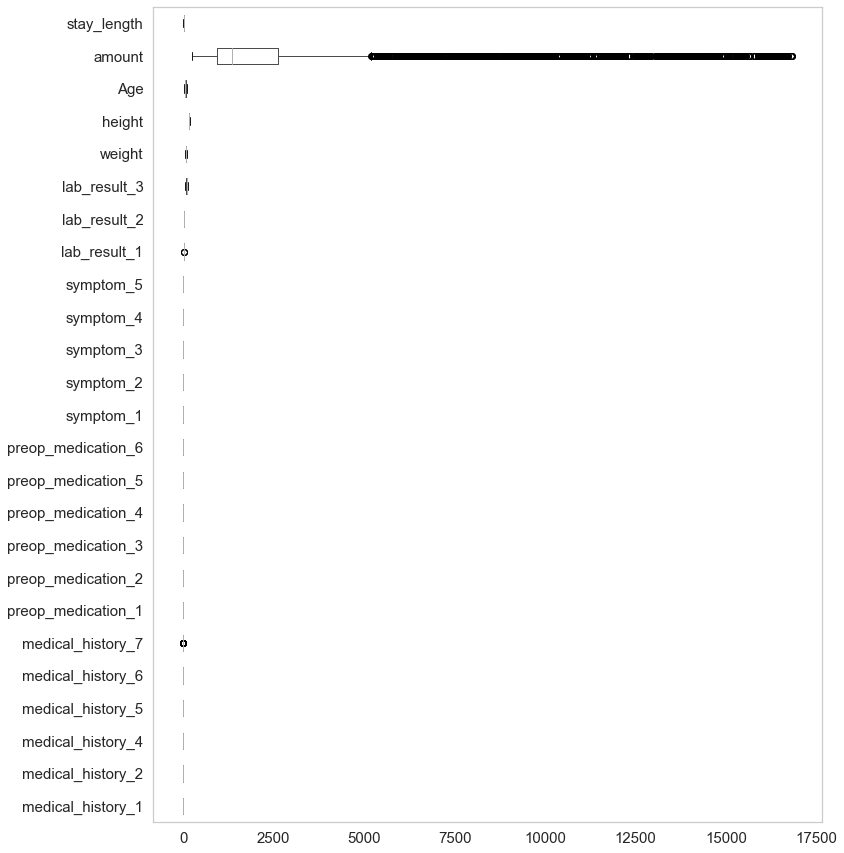

In [81]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
dfno = df2[~((df2<(Q1 -1.5 *IQR)) | (df2 > (Q3 +1.5*IQR))).any(axis=1)]
dfboxplot = dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

In [82]:
df3 = df2[df2['amount'] < 45000] 

In [83]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13573 entries, 1d21f2be18683991eb93d182d6b2d220 to a4c61deaa9ce86b4d2289eab6128b872
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date_of_admission   13573 non-null  object 
 1   medical_history_1   13573 non-null  int64  
 2   medical_history_2   13573 non-null  float64
 3   medical_history_3   13573 non-null  object 
 4   medical_history_4   13573 non-null  int64  
 5   medical_history_5   13573 non-null  float64
 6   medical_history_6   13573 non-null  int64  
 7   medical_history_7   13573 non-null  int64  
 8   preop_medication_1  13573 non-null  int64  
 9   preop_medication_2  13573 non-null  int64  
 10  preop_medication_3  13573 non-null  int64  
 11  preop_medication_4  13573 non-null  int64  
 12  preop_medication_5  13573 non-null  int64  
 13  preop_medication_6  13573 non-null  int64  
 14  symptom_1           13573 non-null  int64  
 15  

In [84]:
df3.head()

,date_of_admission,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,Age,amount,stay_length
patient_id,,,,,,,,,,,,,,,,,,,,,
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,1133.601902,10
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,12338.269972,10
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,982.332324,10
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,951.214467,10
1d21f2be18683991eb93d182d6b2d220,2015-09-17,0,0.0,0,0,0.0,0,1,1,1,...,23.7,108.0,72.3,161.0,Male,Indian,Singapore citizen,44,1498.125668,13


In [85]:
df3.head()

,date_of_admission,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,Age,amount,stay_length
patient_id,,,,,,,,,,,,,,,,,,,,,
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,1133.601902,10
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,12338.269972,10
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,982.332324,10
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,30.9,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,951.214467,10
1d21f2be18683991eb93d182d6b2d220,2015-09-17,0,0.0,0,0,0.0,0,1,1,1,...,23.7,108.0,72.3,161.0,Male,Indian,Singapore citizen,44,1498.125668,13


In [86]:
df3['amount_log']=np.log10(df3['amount'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
df3.head()

,date_of_admission,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,lab_result_3,weight,height,gender,race,resident_status,Age,amount,stay_length,amount_log
patient_id,,,,,,,,,,,,,,,,,,,,,
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,1133.601902,10,3.054461
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,12338.269972,10,4.091254
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,982.332324,10,2.992258
1d21f2be18683991eb93d182d6b2d220,2011-01-01,0,1.0,0,0,0.0,0,0,1,0,...,123.0,71.3,161.0,Male,Indian,Singapore citizen,44,951.214467,10,2.978278
1d21f2be18683991eb93d182d6b2d220,2015-09-17,0,0.0,0,0,0.0,0,1,1,1,...,108.0,72.3,161.0,Male,Indian,Singapore citizen,44,1498.125668,13,3.175548


In [109]:
df3['day_of_admission_'] = pd.to_datetime(df3['day_of_admission_'], format='%Y-%m-%d')
df3['day_of_week'] = df3['day_of_admission_'].dt.day_name()
df3['month'] = df3['day_of_admission_'].dt.month

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [110]:
df3.head()

,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,...,gender,race,resident_status,Age,amount,stay_length,amount_log,day_of_admission_,day_of_week,month
patient_id,,,,,,,,,,,,,,,,,,,,,
1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,1,...,Male,Indian,Singapore citizen,44,1133.601902,10,3.054461,2011-01-01,Saturday,1
1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,1,...,Male,Indian,Singapore citizen,44,12338.269972,10,4.091254,2011-01-01,Saturday,1
1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,1,...,Male,Indian,Singapore citizen,44,982.332324,10,2.992258,2011-01-01,Saturday,1
1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,1,...,Male,Indian,Singapore citizen,44,951.214467,10,2.978278,2011-01-01,Saturday,1
1d21f2be18683991eb93d182d6b2d220,0,0.0,0,0,0.0,0,1,1,1,1,...,Male,Indian,Singapore citizen,44,1498.125668,13,3.175548,2015-09-17,Thursday,9


In [111]:
df3.drop(columns=['date_of_admission'], inplace=True)

KeyError: "['date_of_admission'] not found in axis"

In [112]:
df3.head()

,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,...,gender,race,resident_status,Age,amount,stay_length,amount_log,day_of_admission_,day_of_week,month
patient_id,,,,,,,,,,,,,,,,,,,,,
1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,1,...,Male,Indian,Singapore citizen,44,1133.601902,10,3.054461,2011-01-01,Saturday,1
1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,1,...,Male,Indian,Singapore citizen,44,12338.269972,10,4.091254,2011-01-01,Saturday,1
1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,1,...,Male,Indian,Singapore citizen,44,982.332324,10,2.992258,2011-01-01,Saturday,1
1d21f2be18683991eb93d182d6b2d220,0,1.0,0,0,0.0,0,0,1,0,1,...,Male,Indian,Singapore citizen,44,951.214467,10,2.978278,2011-01-01,Saturday,1
1d21f2be18683991eb93d182d6b2d220,0,0.0,0,0,0.0,0,1,1,1,1,...,Male,Indian,Singapore citizen,44,1498.125668,13,3.175548,2015-09-17,Thursday,9


In [113]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13573 entries, 1d21f2be18683991eb93d182d6b2d220 to a4c61deaa9ce86b4d2289eab6128b872
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   medical_history_1   13573 non-null  int64         
 1   medical_history_2   13573 non-null  float64       
 2   medical_history_3   13573 non-null  object        
 3   medical_history_4   13573 non-null  int64         
 4   medical_history_5   13573 non-null  float64       
 5   medical_history_6   13573 non-null  int64         
 6   medical_history_7   13573 non-null  int64         
 7   preop_medication_1  13573 non-null  int64         
 8   preop_medication_2  13573 non-null  int64         
 9   preop_medication_3  13573 non-null  int64         
 10  preop_medication_4  13573 non-null  int64         
 11  preop_medication_5  13573 non-null  int64         
 12  preop_medication_6  13573 non-null  int64        

In [114]:
df3.to_csv('holmusk_eda.csv')